In [ ]:
%matplotlib inline

### Data collected is from the shared assets in an IBM open-source data catalog

#### Question: Do any of the reviews even matter? What traits of the listings bring someone to be potentially influenced in "yes, I want to stay at that place" or pass it over for some other listing? 

#### Could the sentiment of the reviews be applicable as weights in this analysis - Could it show potential business impact 

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
df = pd.read_csv('air.csv')


    #Nodes: The occupant, host and listings involved by actions
    #Edges: The connection between the nodes.
    
    
#To analyze the relation and explain, the relation between the host and user is established by Airbnb as symmetric - If a transaction is brokered, the user becomes an occupant by the host and the host needs the occupant as well. 
#This is relative.

G_symmetric = nx.Graph()

G_symmetric.add_edge("29639142 - Insha","16100964 - Linda"  ),
G_symmetric.add_edge("38115641 - Lia","16100964 - Linda"  ),
G_symmetric.add_edge("14644118 - Angela","16100964 - Linda"  ),  
G_symmetric.add_edge("3292196 - Unique","4447146 - Kelli"  ),
G_symmetric.add_edge("2685965 - Jim","4447146 - Kelli"  ),
G_symmetric.add_edge("4642297 - Karen","4447146 - Kelli"  ),
G_symmetric.add_edge("4962187 - Nikos","4447146 - Kelli"  ),
G_symmetric.add_edge("2915108 - Julie","4447146 - Kelli"  ),
G_symmetric.add_edge("3643526 - Liz","4447146 - Kelli"  ),
G_symmetric.add_edge("5390502 - Diane","4447146 - Kelli"  ),
G_symmetric.add_edge("5522683 - Nicolas","4447146 - Kelli"  ),
G_symmetric.add_edge("7260656 - Joyce","4447146 - Kelli"  ),
G_symmetric.add_edge("5390587 - Lori","4447146 - Kelli"  ),
G_symmetric.add_edge("8089932 - Bonnie And Tom","4447146 - Kelli"  ),
G_symmetric.add_edge("15693294 - Amy","4447146 - Kelli"  ),
G_symmetric.add_edge("7228772 - Dennis","4447146 - Kelli"  ),
G_symmetric.add_edge("2320463 - Rosalinda","4447146 - Kelli"  ),
G_symmetric.add_edge("19635051 - Robert","4447146 - Kelli"  ),
G_symmetric.add_edge("10109371 - Lennie","4447146 - Kelli"  ),
G_symmetric.add_edge("21528551 - Gary","4447146 - Kelli"  ),
G_symmetric.add_edge("19808078 - Betty","4447146 - Kelli"  ),
G_symmetric.add_edge("9912145 - Lisa","4447146 - Kelli"  ),
G_symmetric.add_edge("8806633 - Marta","4447146 - Kelli"  ),
G_symmetric.add_edge("5854640 - Aga","4447146 - Kelli"  ),
G_symmetric.add_edge("24709215 - Amber","4447146 - Kelli"  ),
G_symmetric.add_edge("1696506 - Kay","4447146 - Kelli"  ),
G_symmetric.add_edge("25061092 - Charlene","4447146 - Kelli"  ),
G_symmetric.add_edge("14478810 - Meg","4447146 - Kelli"  ),
G_symmetric.add_edge("29545204 - Keith","4447146 - Kelli"  ),
G_symmetric.add_edge("10109371 - Lennie","4447146 - Kelli"  ),
G_symmetric.add_edge("17934109 - Julia","4447146 - Kelli"  ),
G_symmetric.add_edge("18486437 - Amanda","4447146 - Kelli"  ),
G_symmetric.add_edge("4629064 - Leah","2944360 - Brynn"  ),
G_symmetric.add_edge("25008568 - Ive","2944360 - Brynn"  ),
G_symmetric.add_edge("26703896 - Rachel","2944360 - Brynn"  ),
G_symmetric.add_edge("7131616 - Jessie","2944360 - Brynn"  ),
G_symmetric.add_edge("17126342 - Alison","2944360 - Brynn"  ),
G_symmetric.add_edge("28293815 - Christina","2944360 - Brynn"  ),
G_symmetric.add_edge("26760798 - Christine","2944360 - Brynn"  ),
G_symmetric.add_edge("23819290 - Gary","2944360 - Brynn"  ),
G_symmetric.add_edge("26310417 - Gianna","2944360 - Brynn"  ),
G_symmetric.add_edge("16667031 - Soo","2944360 - Brynn"  )

print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 41
Average degree:   1.8636


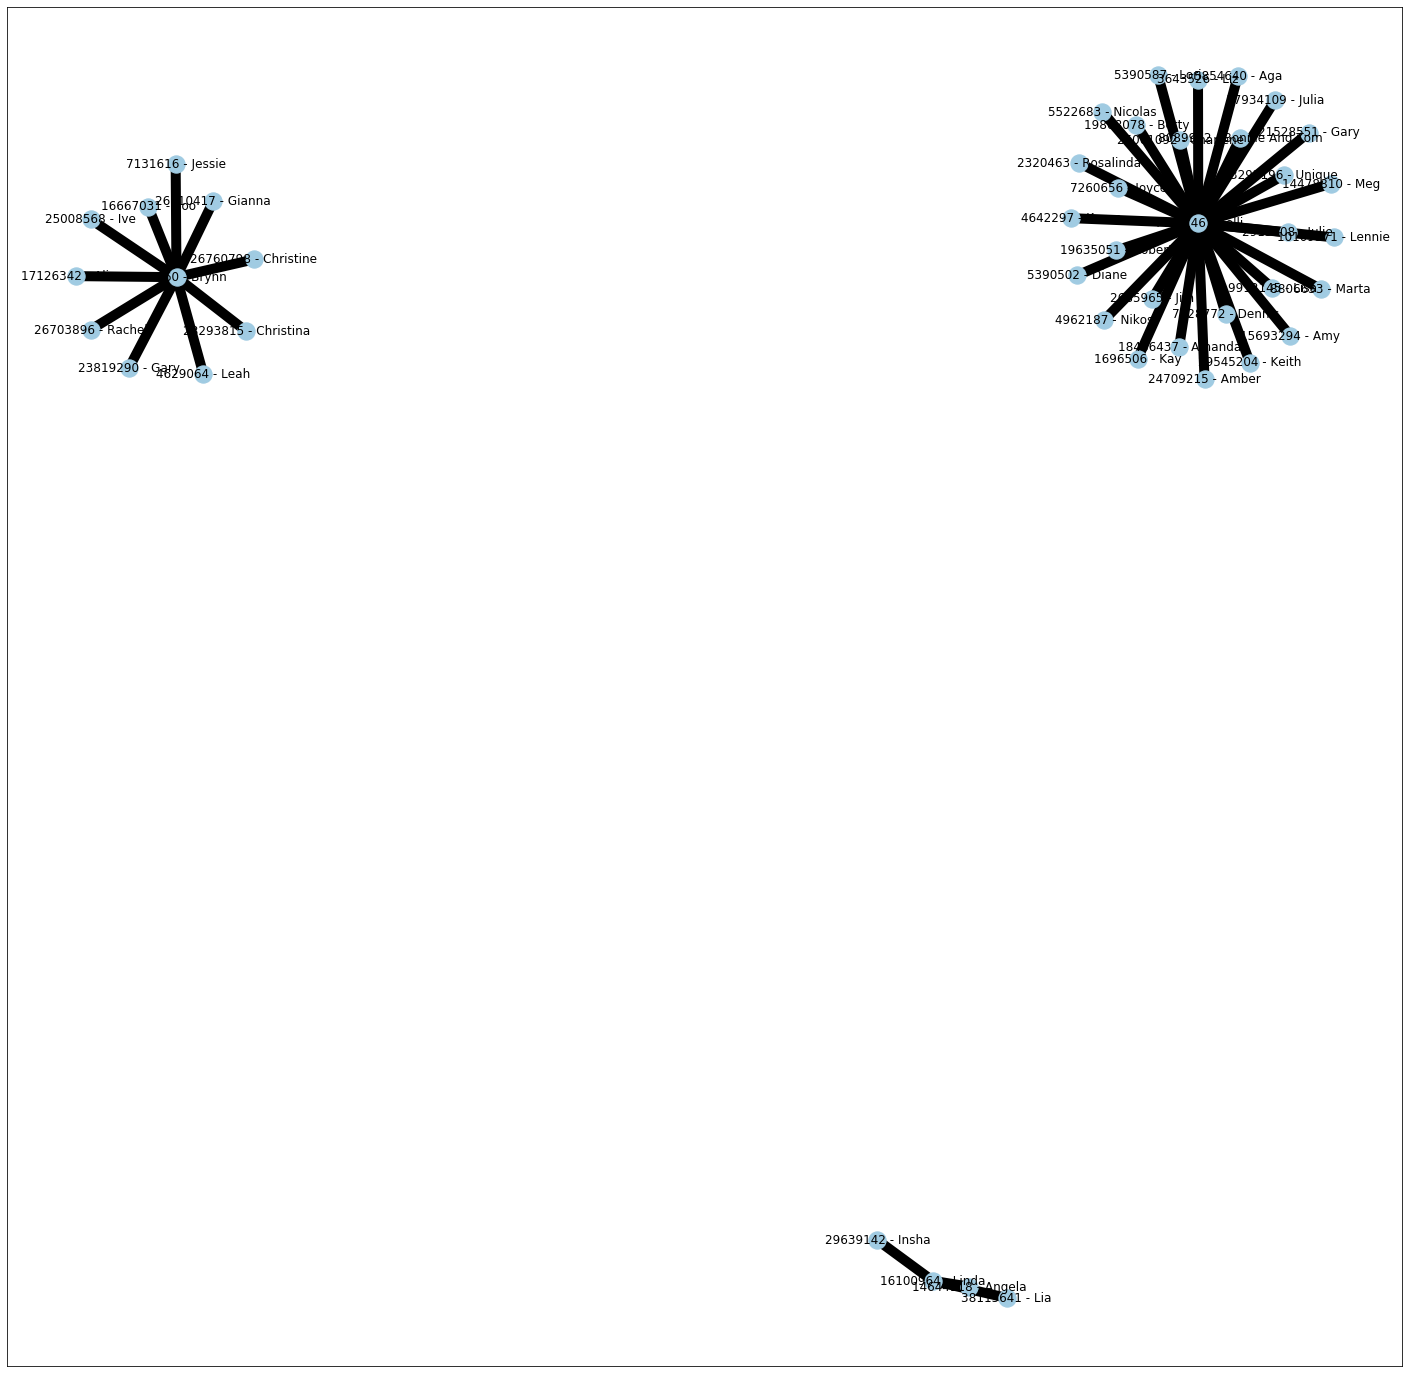

In [44]:
plt.figure(figsize=(25,25))
options = {
    "node_color": "#A0CBE2",
    "edge_color": "black",
    "width": 10,
    "edge_cmap": plt.cm.Blues,
}
nx.draw_networkx(G_symmetric, **options);

In [82]:
import pandas as pd
import numpy as np
import re
# !pip install spacy 
# !python -m spacy download en


# So the connection between host and user is symmetric, one begets the other.

# Weighted values attached to the analysis can be utilized to show insights from sentiment of the reviews per user as an occupant,
# What can be shown by value could vary as a weight depending on importance placed by what the aim is.

text = df.loc[:, "comments"].values
print(text)


G_weighted = nx.Graph()


G_weighted.add_edge("29639142 - Insha","16100964 - Linda",   weight=12),
G_weighted.add_edge("38115641 - Lia","16100964 - Linda",   weight=12  ),
G_weighted.add_edge("14644118 - Angela","16100964 - Linda",   weight=12  ),  
G_weighted.add_edge("3292196 - Unique","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("2685965 - Jim","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("4642297 - Karen","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("4962187 - Nikos","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("2915108 - Julie","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("3643526 - Liz","4447146 - Kelli",   weight=2  ),
G_weighted.add_edge("5390502 - Diane","4447146 - Kelli",  weight=2),
G_weighted.add_edge("5522683 - Nicolas","4447146 - Kelli",   weight=2),
G_weighted.add_edge("7260656 - Joyce","4447146 - Kelli",   weight=2),
G_weighted.add_edge("5390587 - Lori","4447146 - Kelli",   weight=2),
G_weighted.add_edge("8089932 - Bonnie And Tom","4447146 - Kelli",  weight=2),
G_weighted.add_edge("15693294 - Amy","4447146 - Kelli",   weight=2),
G_weighted.add_edge("7228772 - Dennis","4447146 - Kelli",   weight=2),
G_weighted.add_edge("2320463 - Rosalinda","4447146 - Kelli",   weight=2),
G_weighted.add_edge("19635051 - Robert","4447146 - Kelli",   weight=2),
G_weighted.add_edge("10109371 - Lennie","4447146 - Kelli",   weight=2),
G_weighted.add_edge("21528551 - Gary","4447146 - Kelli",   weight=2),
G_weighted.add_edge("19808078 - Betty","4447146 - Kelli",   weight=2),
G_weighted.add_edge("9912145 - Lisa","4447146 - Kelli",   weight=2),
G_weighted.add_edge("8806633 - Marta","4447146 - Kelli",   weight=2),
G_weighted.add_edge("5854640 - Aga","4447146 - Kelli",   weight=2),
G_weighted.add_edge("24709215 - Amber","4447146 - Kelli",   weight=2),
G_weighted.add_edge("1696506 - Kay","4447146 - Kelli",   weight=2),
G_weighted.add_edge("25061092 - Charlene","4447146 - Kelli",   weight=2),
G_weighted.add_edge("14478810 - Meg","4447146 - Kelli",   weight=2),
G_weighted.add_edge("29545204 - Keith","4447146 - Kelli",   weight=2),
G_weighted.add_edge("10109371 - Lennie","4447146 - Kelli",   weight=2),
G_weighted.add_edge("17934109 - Julia","4447146 - Kelli",   weight=2),
G_weighted.add_edge("18486437 - Amanda","4447146 - Kelli",   weight=2),
G_weighted.add_edge("4629064 - Leah","2944360 - Brynn",   weight=5),  
G_weighted.add_edge("25008568 - Ive","2944360 - Brynn", weight=5 ),
G_weighted.add_edge("26703896 - Rachel","2944360 - Brynn",  weight=5), 
G_weighted.add_edge("7131616 - Jessie","2944360 - Brynn",  weight=5),
G_weighted.add_edge("17126342 - Alison","2944360 - Brynn",  weight=5),  
G_weighted.add_edge("28293815 - Christina","2944360 - Brynn",  weight=5),  
G_weighted.add_edge("26760798 - Christine","2944360 - Brynn" ,  weight=5), 
G_weighted.add_edge("23819290 - Gary","2944360 - Brynn",  weight=5),  
G_weighted.add_edge("26310417 - Gianna","2944360 - Brynn",   weight=5), 
G_weighted.add_edge("16667031 - Soo","2944360 - Brynn",  weight=5)
print(nx.info(G_weighted))

NameError: name 'df' is not defined

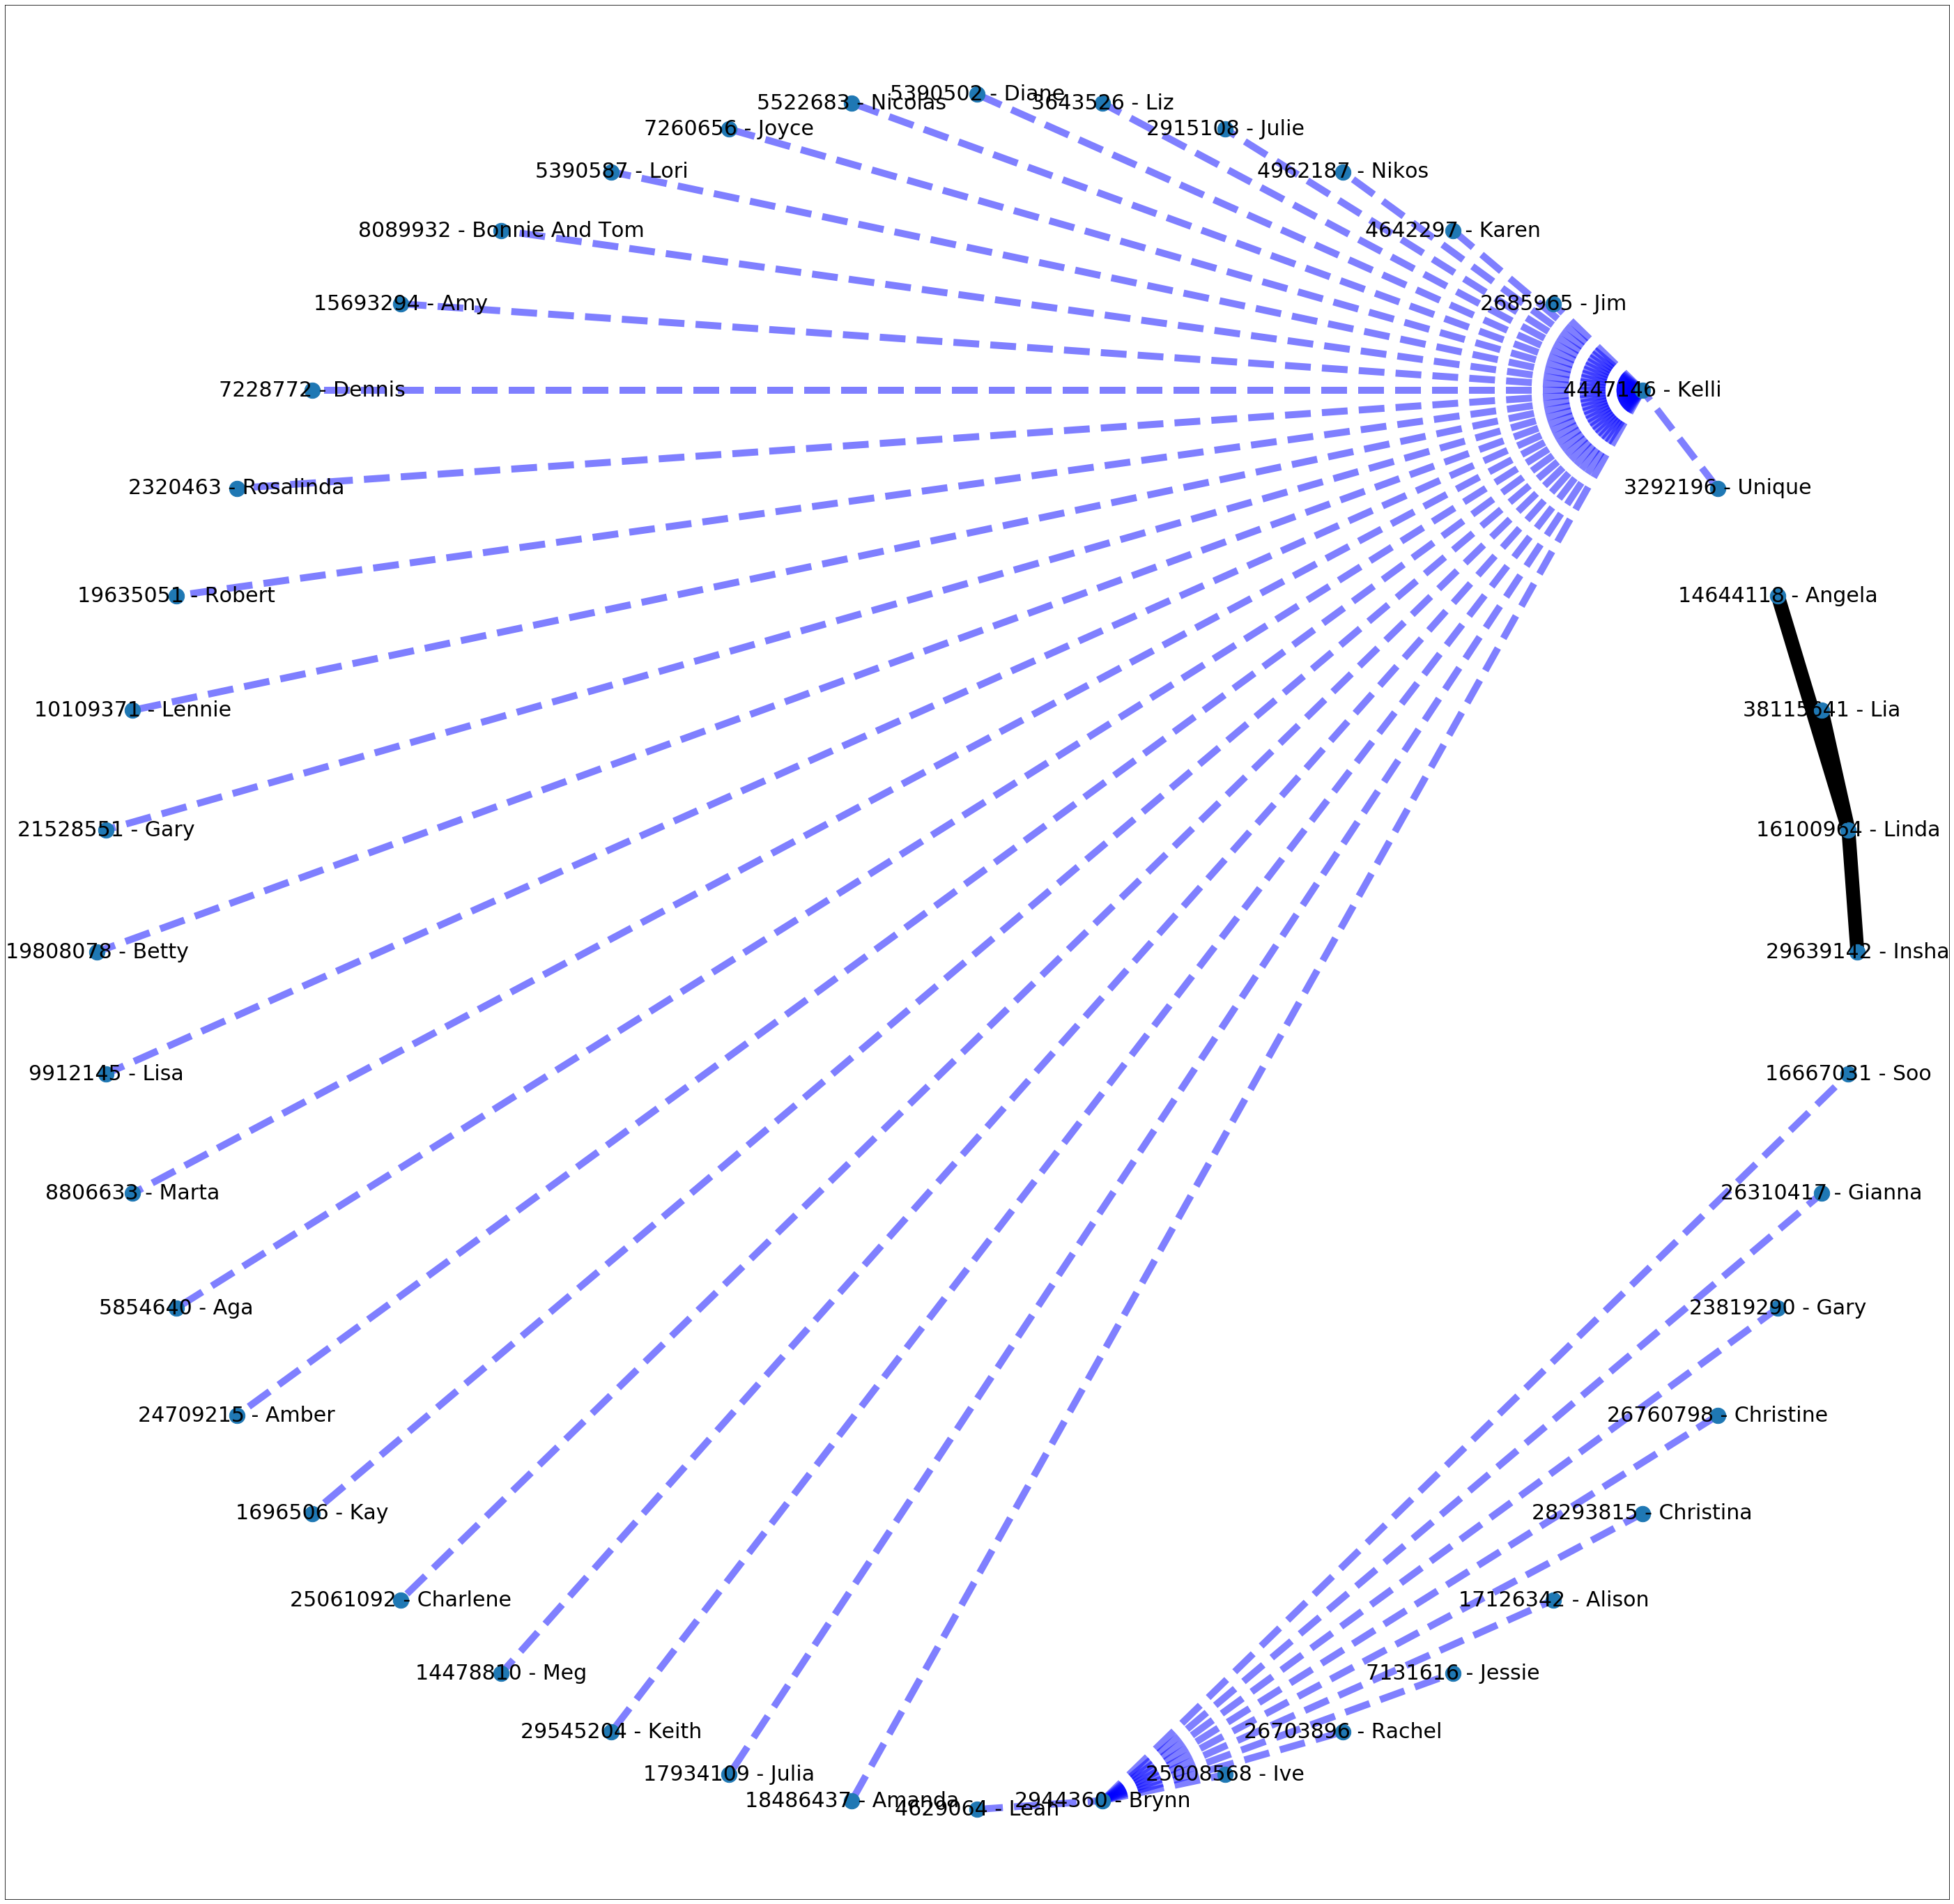

In [80]:
plt.figure(figsize=(50,50))


elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  

# nodes
nx.draw_networkx_nodes(G_weighted, pos,  node_size=500)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=20)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=10, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=30, font_family='sans-serif')

plt.axis('on')
plt.show();
# nx.draw_networkx(G_weighted);

#The greater the weight could mean the more positive than negative of sentiment from the review of the occupant. 


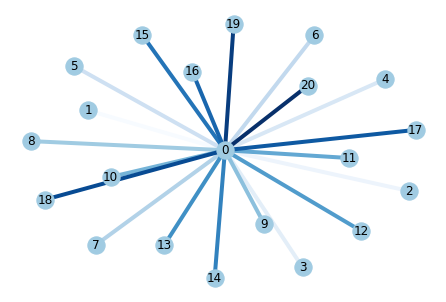

In [11]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams





import matplotlib.pyplot as plt
import networkx as nx

G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
}
nx.draw(G, pos, **options)
plt.show()

In [4]:
import spacy
import heapq
import itertools
import networkx as nx

from operator import itemgetter

from reader import PickledCorpusReader

nlp = spacy.load('en')

GOOD_ENTS = ['PERSON', 'NORP', 'FACILITY', 'ORG', 'GPE', 'LOC',
             'PRODUCT', 'EVENT', 'WORK_OF_ART', 'LANGUAGE']

def entities(sent):
    doc = nlp(sent)
    for ent in doc.ents:
        #  filter out non social entities
        if ent.label_ in GOOD_ENTS:
            return ent.text, ent.label_
        else:
            pass

def pairs(doc):
    candidates = [
        entities(' '.join(word for word, tag in sent))
        for para in doc for sent in para
    ]

    doc_entities = [
        entity for entity in candidates if entity is not None
    ]

    return list(itertools.permutations(set(doc_entities), 2))


def graph(docs):
    G = nx.Graph()
    for doc in docs:
        for pair in pairs(doc):
            if (pair[0][0], pair[1][0]) in G.edges():
                G.edges[(pair[0][0], pair[1][0])]['weight'] += 1
            else:
                G.add_edge(pair[0][0], pair[1][0], weight=1)
    return G

def nbest_centrality(G, metric, n=10, attr="centrality", **kwargs):
    # Compute the centrality scores for each vertex
    scores = metric(G, **kwargs)

    # Set the score as a property on each node
    nx.set_node_attributes(G, name=attr, values=scores)

    # Find the top n scores and print them along with their index
    topn = heapq.nlargest(n, scores.items(), key=itemgetter(1))
    for idx, item in enumerate(topn):
        print("{}. {}: {:0.4f}".format(idx + 1, *item))

    return G


if __name__ == '__main__':
    corpus = PickledCorpusReader("../corpus")
    docs = corpus.docs()
    G = graph(docs)



import heapq
import collections
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from operator import itemgetter

from entities import pairs
from reader import PickledCorpusReader

def graph(corpus):

    # Create an undirected graph
    G = nx.Graph(name="Baleen Entity Graph")

    # Create category, feed, and document nodes
    G.add_nodes_from(corpus.categories(), type='category')
    G.add_nodes_from([feed['title'] for feed in corpus.feeds()], type='feed')
    G.add_nodes_from(corpus.fileids(), type='document')

    # Create feed-category edges
    G.add_edges_from([
        (feed['title'], feed['category']) for feed in corpus.feeds()
    ])

    # Create document-category edges
    G.add_edges_from([
        (fileid, corpus.categories(fileids=fileid)[0])
        for fileid in corpus.fileids()
    ])

    # Add edges for each document-entities and between pairs
    for idx, doc in enumerate(corpus.docs()):
        fileid = corpus.fileids()[idx]
        for pair in pairs(doc):
            # NOTE: each pair is a tuple with (entity,tag)
            # here I'm adding only the entity to the graph,
            # though it might be interesting to add the tags
            # so I can filter the graph by entity type...
            # G.add_edge(fileid, pair[0][0])
            # G.add_edge(fileid, pair[1][0])
            # Now add edges between entity pairs with a weight
            # of 1 for every document they co-appear in
            if (pair[0][0], pair[1][0]) in G.edges():
                G.edges[(pair[0][0], pair[1][0])]['weight'] += 1
            else:
                G.add_edge(pair[0][0], pair[1][0], weight=1)

    return G

ModuleNotFoundError: No module named 'reader'

In [6]:
import bs4
import time
import nltk
import pickle
import logging

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader

from readability.readability import Unparseable
from readability.readability import Document as Paper
from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

log = logging.getLogger("readability.readability")
log.setLevel('WARNING')

DOC_PATTERN = r'(?!\.)[a-z_\s]+/[a-f0-9]+\.json'
PKL_PATTERN = r'(?!\.)[a-z_\s]+/[a-f0-9]+\.pickle'
CAT_PATTERN = r'([a-z_\s]+)/.*'

TAGS = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p', 'li']


class HTMLCorpusReader(CategorizedCorpusReader, CorpusReader):
    """
    A corpus reader for raw HTML documents to enable preprocessing.
    """

    def __init__(self, root, fileids=DOC_PATTERN, encoding='utf8',
                 tags=TAGS, **kwargs):
        """
        Initialize the corpus reader.  Categorization arguments
        (``cat_pattern``, ``cat_map``, and ``cat_file``) are passed to
        the ``CategorizedCorpusReader`` constructor.  The remaining
        arguments are passed to the ``CorpusReader`` constructor.
        """
        # Add the default category pattern if not passed into the class.
        if not any(key.startswith('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = CAT_PATTERN

        # Initialize the NLTK corpus reader objects
        CategorizedCorpusReader.__init__(self, kwargs)
        CorpusReader.__init__(self, root, fileids, encoding)

        # Save the tags that specifically would want to extract.
        self.tags = tags

    def resolve(self, fileids, categories):
        """
        Returns a list of fileids or categories depending on what is passed
        to each internal corpus reader function. Implemented similarly to
        the NLTK ``CategorizedPlaintextCorpusReader``.
        """
        if fileids is not None and categories is not None:
            raise ValueError("Specify fileids or categories, not both")

        if categories is not None:
            return self.fileids(categories)
        return fileids

    def docs(self, fileids=None, categories=None):
        """
        Returns the complete text of an HTML document, closing the document
        after this are done reading it and yielding it in a memory safe fashion.
        """
        # Resolve the fileids and the categories
        fileids = self.resolve(fileids, categories)

        # Create a generator, loading one document into memory at a time.
        for path, encoding in self.abspaths(fileids, include_encoding=True):
            with codecs.open(path, 'r', encoding=encoding) as f:
                yield f.read()

    def sizes(self, fileids=None, categories=None):
        """
        Returns a list of tuples, the fileid and size on disk of the file.
        This function is used to detect oddly large files in the corpus.
        """
        # Resolve the fileids and the categories
        fileids = self.resolve(fileids, categories)

        # Create a generator, getting every path and computing filesize
        for path in self.abspaths(fileids):
            yield os.path.getsize(path)

    def html(self, fileids=None, categories=None):
        """
        Returns the HTML content of each document, cleaning it using
        the readability-lxml library.
        """
        for doc in self.docs(fileids, categories):
            try:
                yield Paper(doc).summary()
            except Unparseable as e:
                print("Could not parse HTML: {}".format(e))
                continue

    def paras(self, fileids=None, categories=None):
        """
        Uses BeautifulSoup to parse the paragraphs from the HTML.
        """
        for html in self.html(fileids, categories):
            soup = bs4.BeautifulSoup(html, 'lxml')
            for element in soup.find_all(self.tags):
                yield element.text
            soup.decompose()

    def sents(self, fileids=None, categories=None):
        """
        Uses the built in sentence tokenizer to extract sentences from the
        paragraphs. Note that this method uses BeautifulSoup to parse HTML.
        """
        for paragraph in self.paras(fileids, categories):
            for sentence in sent_tokenize(paragraph):
                yield sentence

    def words(self, fileids=None, categories=None):
        """
        Uses the built in word tokenizer to extract tokens from sentences.
        Note that this method uses BeautifulSoup to parse HTML content.
        """
        for sentence in self.sents(fileids, categories):
            for token in wordpunct_tokenize(sentence):
                yield token

    def tokenize(self, fileids=None, categories=None):
        """
        Segments, tokenizes, and tags a document in the corpus.
        """
        for paragraph in self.paras(fileids=fileids):
            yield [
                pos_tag(wordpunct_tokenize(sent))
                for sent in sent_tokenize(paragraph)
            ]

    def describe(self, fileids=None, categories=None):
        """
        Performs a single pass of the corpus and
        returns a dictionary with a variety of metrics
        concerning the state of the corpus.
        """
        started = time.time()

        # Structures to perform counting.
        counts  = nltk.FreqDist()
        tokens  = nltk.FreqDist()

        # Perform single pass over paragraphs, tokenize and count
        for para in self.paras(fileids, categories):
            counts['paras'] += 1

            for sent in sent_tokenize(para):
                counts['sents'] += 1

                for word in wordpunct_tokenize(sent):
                    counts['words'] += 1
                    tokens[word] += 1

        # Compute the number of files and categories in the corpus
        n_fileids = len(self.resolve(fileids, categories) or self.fileids())
        n_topics  = len(self.categories(self.resolve(fileids, categories)))

        # Return data structure with information
        return {
            'files':  n_fileids,
            'topics': n_topics,
            'paras':  counts['paras'],
            'sents':  counts['sents'],
            'words':  counts['words'],
            'vocab':  len(tokens),
            'lexdiv': float(counts['words']) / float(len(tokens)),
            'ppdoc':  float(counts['paras']) / float(n_fileids),
            'sppar':  float(counts['sents']) / float(counts['paras']),
            'secs':   time.time() - started,
        }


class PickledCorpusReader(CategorizedCorpusReader, CorpusReader):

    def __init__(self, root, fileids=PKL_PATTERN, **kwargs):
        """
        Initialize the corpus reader.  Categorization arguments
        (``cat_pattern``, ``cat_map``, and ``cat_file``) are passed to
        the ``CategorizedCorpusReader`` constructor.  The remaining arguments
        are passed to the ``CorpusReader`` constructor.
        """
        # Add the default category pattern if not passed into the class.
        if not any(key.startswith('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = CAT_PATTERN

        CategorizedCorpusReader.__init__(self, kwargs)
        CorpusReader.__init__(self, root, fileids)

    def resolve(self, fileids, categories):
        """
        Returns a list of fileids or categories depending on what is passed
        to each internal corpus reader function. This primarily bubbles up to
        the high level ``docs`` method, but is implemented here similar to
        the nltk ``CategorizedPlaintextCorpusReader``.
        """
        if fileids is not None and categories is not None:
            raise ValueError("Specify fileids or categories, not both")

        if categories is not None:
            return self.fileids(categories)
        return fileids

    def docs(self, fileids=None, categories=None):
        """
        Returns the document loaded from a pickled object for every file in
        the corpus. Similar to the BaleenCorpusReader, this uses a generator
        to acheive memory safe iteration.
        """
        # Resolve the fileids and the categories
        fileids = self.resolve(fileids, categories)

        # Create a generator, loading one document into memory at a time.
        for path, enc, fileid in self.abspaths(fileids, True, True):
            with open(path, 'rb') as f:
                yield pickle.load(f)

    def paras(self, fileids=None, categories=None):
        """
        Returns a generator of paragraphs where each paragraph is a list of
        sentences, which is in turn a list of (token, tag) tuples.
        """
        for doc in self.docs(fileids, categories):
            for paragraph in doc:
                yield paragraph

    def sents(self, fileids=None, categories=None):
        """
        Returns a generator of sentences where each sentence is a list of
        (token, tag) tuples.
        """
        for paragraph in self.paras(fileids, categories):
            for sentence in paragraph:
                yield sentence

    def tagged(self, fileids=None, categories=None):
        for sent in self.sents(fileids, categories):
            for token in sent:
                yield token

    def words(self, fileids=None, categories=None):
        """
        Returns a generator of (token, tag) tuples.
        """
        for token in self.tagged(fileids, categories):
            yield token[0]


if __name__ == '__main__':
    from collections import Counter

    corpus = PickledCorpusReader('../corpus')
    words  = Counter(corpus.words())

    print("{:,} vocabulary {:,} word count".format(len(words.keys()), sum(words.values())))

ModuleNotFoundError: No module named 'readability'